In [1]:
# Step1. Look for basic info from data
import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep='\t') #.tsv : tap separated values
print(chipo.shape)
print("------------------------------------------")
print(chipo.info())


(4622, 5)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
chipo['order_id'] = chipo['order_id'].astype(str)  #order_id column은 숫자형태이지만 수치적인 의미가 존재한다고 보기는 어렵기 때문에 string으로 type변환해주어서 describe()에서 제외
print(chipo.describe())    # only numerical type column data : quantity is decribed

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [4]:
# order_id와 item_name의 갯수 확인 (both categorical features)
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))
# Concludes : 1834 orders have been made, 50 different menu items

1834
50


In [5]:
# Step2. Discovering Insight : visualizing data
# ex1) Top10 most ordered items?
item_count = chipo['item_name'].value_counts()[:10]
item_count
# pandas.Series.value_counts() : counts unique values of a series

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [6]:
# Top X : ~ 형태로 출력
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("Top", idx, ":", val, cnt)
# enumerate() : takes collection and return as enumerate object (add counter as the key)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [7]:
# ex2) Order counts on different items
order_count = chipo.groupby('item_name')['order_id'].count()
# order_count는 chipo를 item_name을 기준으로 group_by해서 (index로 'item_name')
# 서로 다른 'order_id'의 갯수를 세서 그 갯수를 저장한 series
order_count[:10]   # item당 주문 갯수 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [8]:
# item별 주문 총량은?
item_quantity = chipo.groupby('item_name')['quantity'].sum()
# chipo : DataFrame.
# DataFrame을 item_name으로 groupby한 다음, 'quantity' column만 projection
# item_quantity 는 series (index : item_name, sum값들이 values)
item_quantity[:10] #item당 주문 총량 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

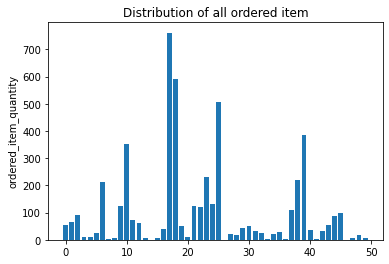

In [9]:
# item별 주문 총량을 막대 그래프로 표현
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep = '\t')
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_name_list = item_quantity.index.tolist() # 모든 item name들을 표현하기는 힘들기 때문에 list로 변환
x_pos = np.arange(len(item_name_list)) # index들을 x축의 값으로..

order_qty = item_quantity.values.tolist()
plt.bar(x_pos, order_qty, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Distribution of all ordered item')

plt.show()

In [10]:
#difference between value_counts() / unique()
print(chipo['item_name'].value_counts()[:10])
print()
print(type(chipo['item_name'].value_counts()))
print()
print(chipo['item_name'].unique()[:10])
print()
print(type(chipo['item_name'].unique()))
# value_counts() : unique한 value를 가지는 item_name의 숫자.. => returns Series
# unique() : item_name의 unique한 값들 자체를 list_up => returns ndarray

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

<class 'pandas.core.series.Series'>

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']

<class 'numpy.ndarray'>


In [11]:
# step4. 스무고개로 분석하는 개념적 탐색
# ex1) Mean item prices per order
chipo.groupby('order_id')['item_price'].sum()
# 정확하게는 sum이 아니라 string의 concatenate의 형식으로 나열됨 => 현재 price는 $표시가 붙은 string꼴이기 때문에!!

order_id
1       $2.39 $3.39 $3.39 $2.39 
2                        $16.98 
3                  $10.98 $1.69 
4                  $11.75 $9.25 
5                   $9.25 $4.45 
                  ...           
1830              $11.75 $11.25 
1831          $9.25 $2.15 $1.50 
1832                $8.75 $4.45 
1833              $11.75 $11.75 
1834         $11.25 $8.75 $8.75 
Name: item_price, Length: 1834, dtype: object

In [12]:
# 전처리 작업 필요: using apply, lambda
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [13]:
# 주문 당 평균 계산금액 출력 :
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep = '\t')
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [21]:
# ex2) order ids with (order prices >=10$)
import matplotlib.pyplot as plt
import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep = '\t')
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >=10]
print(results[:10]) #상위 10개
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


In [15]:
#ex3) ordering each item by item price
chipo_one_item = chipo[chipo.quantity ==1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


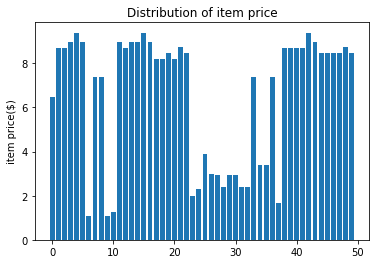

In [16]:
# ex4) item price distribution graph (bar chart)
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

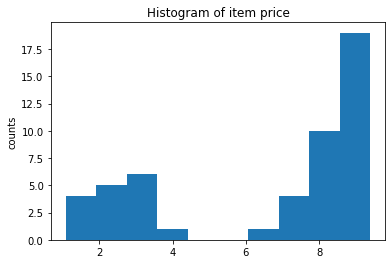

In [17]:
# ex5) Item counts at each item price range (histogram)
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [18]:
# ex6) How many items were sold in the most expensive order
chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)[:1]['quantity']

order_id
926    23
Name: quantity, dtype: int64

In [19]:
# ex7) How many "Veggie Salad Bowl" orders were taken?
chipo_salad = chipo[chipo['item_name']=="Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name들을 제거해야한다 => drop_duplicates()
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])
print(len(chipo_salad))   #총 18번 주문됨
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
